# 01 - Exploratory Data Analysis (EDA) and Data Preprocessing

This notebook is dedicated to performing an in-depth Exploratory Data Analysis (EDA) on the raw insurance claims dataset and subsequently preparing the data for machine learning modeling. This involves understanding data characteristics, identifying patterns, handling missing values, encoding categorical features, and standardizing numerical data.

## 1.1 Import Libraries

This initial cell imports all the necessary Python libraries that will be utilized throughout the EDA and preprocessing phases of this notebook. Each library plays a distinct role:

* **`pandas as pd`**: This is the fundamental library for data manipulation and analysis. It provides powerful data structures like DataFrames, which are essential for handling tabular data.
* **`numpy as np`**: This library is crucial for numerical operations, especially for working with arrays and performing mathematical computations efficiently.
* **`matplotlib.pyplot as plt`**: As the foundational plotting library, `matplotlib.pyplot` is used for creating static, interactive, and animated visualizations, which are vital for understanding data distributions and relationships during EDA.
* **`sklearn.preprocessing.LabelEncoder`**: This utility from Scikit-learn is used for encoding categorical labels with numerical values. It transforms non-numeric labels into machine-readable integers, a common preprocessing step for many machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### 1.2 Load Raw Dataset and Initial Overview

This cell is responsible for loading the raw insurance claims dataset from its specified path and performing essential initial inspections. These initial steps are crucial for understanding the structure, content, and quality of the raw data before any preprocessing or analysis begins.

1.  **Define File Path**:
    * `file_path = 'E:/Project_2/insurance-risk-model/data/raw/insurance_claims.csv'`: This line defines the exact location of our raw dataset. It's good practice to store raw data separately in a `data/raw` directory within your project structure.

2.  **Robust Data Loading with Error Handling**:
    * The `try...except FileNotFoundError` block is implemented to make the data loading process more robust.
    * `try`: It attempts to execute the code within this block. If the file is found, `pd.read_csv(file_path)` will load the data into a pandas DataFrame named `df`.
    * `except FileNotFoundError`: If the file specified by `file_path` does not exist at the given location, instead of crashing, the program will execute the code within this block, printing a user-friendly error message indicating that the file was not found and suggesting the expected path. `df` is set to `None` in this case to prevent further errors.

3.  **Initial Data Inspections (if load is successful)**:
    * `if df is not None:`: All subsequent inspection steps are conditionally executed only if the DataFrame `df` was successfully loaded (i.e., not `None`).
    * **`print(df.head())`**: This displays the first 5 rows of the DataFrame. It provides an immediate visual preview of the data, allowing us to quickly see the column names, the type of data they contain, and a few sample records. This is vital for a qualitative check of the data's integrity.
    * **`df.info()`**: This method prints a concise summary of the DataFrame. It's extremely valuable for:
        * **Data Types**: Identifying the data type of each column (e.g., `int64`, `float64`, `object`). This is critical for understanding how pandas has interpreted the data and for planning necessary type conversions.
        * **Non-Null Counts**: Showing the number of non-missing values for each column. By comparing this count to the total number of entries, we can quickly spot columns with missing data.
        * **Memory Usage**: Providing an estimate of the DataFrame's memory consumption.
    * **`df.describe(include='all')`**: This generates descriptive (summary) statistics of the DataFrame.
        * The `include='all'` argument is important because it tells pandas to generate statistics for **both numerical and object (categorical) columns**.
        * For numerical columns, it provides statistics like `count`, `mean`, `std` (standard deviation), `min`, `max`, and quartile values (25%, 50% / median, 75%).
        * For object/categorical columns, it provides `count`, `unique` (number of distinct values), `top` (most frequent value), and `freq` (frequency of the top value). This helps in understanding the distribution and variety of categorical features.
    * **`df.isnull().sum()`**: This crucial line calculates and displays the total count of missing values for each column in the DataFrame. This provides a quantitative overview of data completeness and directly informs our strategy for handling missing data in subsequent preprocessing steps.

These initial checks lay the foundation for a deeper exploratory data analysis and guide our preprocessing decisions.

In [2]:
file_path = 'E:/Project_2/insurance-risk-model/data/raw/insurance_claims.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
    print("Expected path: insurance-risk-model/data/raw/insurance_claims.csv")
    df = None

if df is not None:
    print("\n--- First 5 rows of the dataset ---")
    print(df.head())

    print("\n--- Dataset Info ---")
    df.info()

    print("\n--- Descriptive Statistics ---")
    print(df.describe(include='all'))

    print("\n--- Missing Values ---")
    print(df.isnull().sum())

Dataset loaded successfully!

--- First 5 rows of the dataset ---
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_avai

### 1.3 Initial Data Cleaning and Feature Engineering

This cell performs several crucial data cleaning and initial feature engineering steps to prepare the raw dataset for further analysis and modeling. These transformations address inconsistencies and extract valuable information from existing columns.

1.  **Dropping an Extraneous Column**:
    * `df = df.drop(columns=['_c39'])`: This line removes the column named `_c39` from the DataFrame. Columns like `_c39` often appear when a CSV file has an extra, unnamed column (e.g., due to an extra comma at the end of each row or a remnant from a previous save). It's generally an empty or irrelevant column that needs to be removed to clean the dataset.

2.  **Handling Placeholder Missing Values**:
    * `for col in ['collision_type', 'police_report_available', 'property_damage', 'authorities_contacted']: df[col] = df[col].replace('?', np.nan)`: This loop iterates through a specific list of categorical columns that are known to contain '?' as a placeholder for missing values.
    * `replace('?', np.nan)`: The '?' string is replaced with `np.nan` (Not a Number) from the NumPy library. `np.nan` is the standard way to represent missing values in pandas, allowing for proper detection and handling using pandas' built-in missing data functionalities (e.g., `isnull().sum()`, `dropna()`, `fillna()`). This standardization is essential for accurate analysis and imputation.

3.  **Date Feature Engineering**:
    * `df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])`
    * `df['incident_date'] = pd.to_datetime(df['incident_date'])`: These lines convert the `policy_bind_date` and `incident_date` columns from their original string/object format into datetime objects using `pd.to_datetime()`. This conversion is critical because it unlocks powerful datetime-specific functionalities, allowing us to extract various temporal features.
    * `df['policy_bind_year'] = df['policy_bind_date'].dt.year`
    * `df['incident_year'] = df['incident_date'].dt.year`
    * `df['incident_month'] = df['incident_date'].dt.month`: From the converted datetime columns, we extract new numerical features: the year of the policy binding, the year of the incident, and the month of the incident. These features can be highly predictive as they capture potential temporal trends or seasonal patterns in claims and policies.

4.  **Creating a Binary `claim_occurred` Feature**:
    * `df['claim_occurred'] = (df['total_claim_amount'] > 0).astype(int)`: This line engineers a new binary feature called `claim_occurred`.
    * `(df['total_claim_amount'] > 0)`: This creates a boolean Series, `True` if `total_claim_amount` is greater than 0, and `False` otherwise.
    * `.astype(int)`: This converts the boolean `True`/`False` values into integers `1` and `0` respectively. This feature serves as a clear indicator of whether a claim was filed, simplifying the presence of a claim into a straightforward numerical format for analysis.

These cleaning and engineering steps significantly enhance the dataset's quality and prepare it for more in-depth exploratory analysis and subsequent machine learning model training.

In [3]:
df = df.drop(columns=['_c39'])

for col in ['collision_type', 'police_report_available', 'property_damage', 'authorities_contacted']:
    df[col] = df[col].replace('?', np.nan)

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['claim_occurred'] = (df['total_claim_amount'] > 0).astype(int)

### 1.4 Age Distribution Analysis

This cell focuses on visualizing the distribution of the `age` feature using a histogram. Understanding the age distribution of policyholders or individuals involved in incidents can reveal important demographic patterns within the dataset.

1.  **Figure Initialization**:
    * `plt.figure(figsize=(8, 5))`: This line creates a new figure for our plot and sets its size. A figure size of 8 inches wide by 5 inches tall is chosen for optimal readability and presentation.

2.  **Generating the Histogram**:
    * `plt.hist(df['age'], bins=15, edgecolor='black')`: This is the core command for creating the histogram.
        * `df['age']`: Specifies the numerical data from the 'age' column of our DataFrame that we want to visualize.
        * `bins=15`: Determines the number of equal-width bins (intervals) to divide the `age` data into. More bins can show finer details, while fewer bins provide a broader overview. Here, 15 bins are used to offer a reasonable granularity.
        * `edgecolor='black'`: Adds a black border to each bar in the histogram. This enhances visual clarity by clearly distinguishing between adjacent bins.

3.  **Adding Plot Labels and Title**:
    * `plt.title('Distribution of Age')`: Sets the main title of the histogram, clearly indicating what the plot represents.
    * `plt.xlabel('Age')`: Labels the x-axis as 'Age', denoting the range of ages.
    * `plt.ylabel('Frequency')`: Labels the y-axis as 'Frequency', indicating the count of individuals falling into each age bin.

4.  **Displaying the Plot**:
    * `plt.show()`: This command displays the generated histogram.

By examining this histogram, we can gain insights into the most common age groups within the dataset, identify any outliers, and understand the overall shape and spread of the age demographic. This helps in understanding the typical customer profile and potential age-related risks.

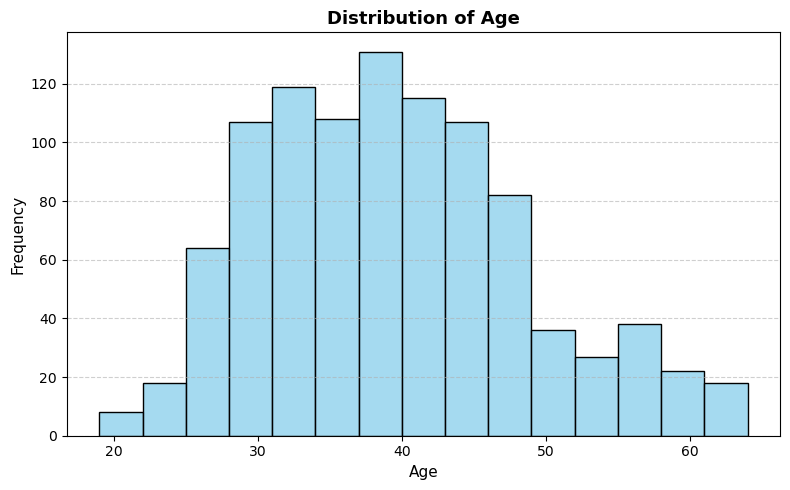

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=15, edgecolor='black', color='skyblue')
plt.title('Distribution of Age', fontsize=13, weight='bold')
plt.xlabel('Age', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 1.5 Target Variable Distribution

This cell visualizes the distribution of our target variable, `fraud_reported`. Understanding the balance (or imbalance) between the 'fraud' and 'non-fraud' classes is a critical step in fraud detection projects, as it profoundly impacts model selection, evaluation, and potential preprocessing strategies like oversampling or undersampling.

1.  **Figure Initialization**:
    * `plt.figure(figsize=(6, 4))`: A new plot figure is created with a size of 6 inches wide by 4 inches tall, providing a compact yet clear visualization space.

2.  **Generating the Bar Plot for Class Distribution**:
    * `df['fraud_reported'].value_counts().plot(kind='bar')`: This is a concise and efficient way to plot the distribution of a categorical variable using pandas' built-in plotting capabilities.
        * `df['fraud_reported'].value_counts()`: This part calculates the frequency of each unique value (0 for 'Not Fraud' and 1 for 'Fraud') in the `fraud_reported` column. It returns a pandas Series where the index represents the unique categories and the values represent their counts.
        * `.plot(kind='bar')`: This method is then called directly on the resulting Series to generate a bar plot, where the height of each bar corresponds to the count of each class.

3.  **Adding Plot Labels and Title**:
    * `plt.title('Distribution of Fraud Reported')`: Sets the main title for the plot, clearly indicating the content.
    * `plt.xlabel('Fraud Reported')`: Labels the horizontal axis, representing the two classes (0 and 1).
    * `plt.ylabel('Count')`: Labels the vertical axis, showing the frequency of each class.
    * `plt.xticks(rotation=0)`: Ensures that the x-axis labels (0 and 1) are displayed horizontally (without rotation), improving readability.

4.  **Displaying the Plot**:
    * `plt.show()`: This command renders and displays the created bar plot.

**Insight from this Plot:**
This visualization is crucial for immediately identifying **class imbalance**. In fraud detection, it's very common to have a significantly smaller number of fraudulent cases compared to legitimate ones. This plot will clearly show whether such an imbalance exists and to what extent, guiding subsequent decisions on how to handle it during model training (e.g., using stratified sampling, specific evaluation metrics, or techniques like SMOTE).

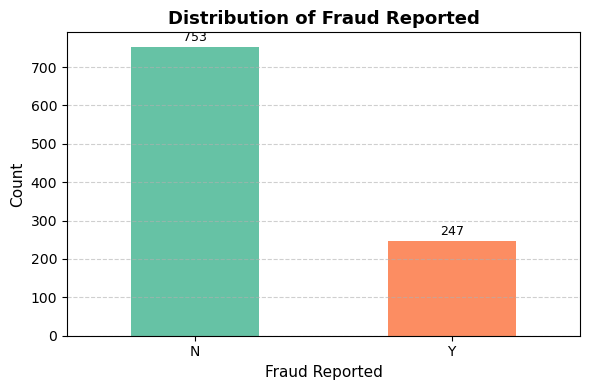

In [5]:
plt.figure(figsize=(6, 4))
counts = df['fraud_reported'].value_counts()
colors = sns.color_palette("Set2", n_colors=len(counts))
counts.plot(kind='bar', color=colors)
plt.title('Distribution of Fraud Reported', fontsize=13, weight='bold')
plt.xlabel('Fraud Reported', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, val in enumerate(counts):
    plt.text(i, val + max(counts) * 0.01, str(val), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### 1.6 Relationship between Age and Total Claim Amount

This cell generates a scatter plot to visually explore the relationship between two continuous numerical variables: `age` (of the policyholder) and `total_claim_amount`. Scatter plots are excellent for identifying potential correlations, patterns, clusters, or outliers between two variables.

1.  **Figure Initialization**:
    * `plt.figure(figsize=(10, 6))`: A new plot figure is created with a size of 10 inches wide by 6 inches tall, providing ample space for the scatter points and labels.

2.  **Generating the Scatter Plot**:
    * `plt.scatter(df['age'], df['total_claim_amount'], alpha=0.5)`: This is the core command for creating the scatter plot.
        * `df['age']`: Specifies the data for the horizontal (x-axis), representing the age of individuals.
        * `df['total_claim_amount']`: Specifies the data for the vertical (y-axis), representing the total amount claimed.
        * `alpha=0.5`: Sets the transparency of the data points. This is particularly useful when there are many overlapping points, as it allows you to visualize areas of higher data density (where points are darker due to overlap).

3.  **Adding Plot Labels, Title, and Grid**:
    * `plt.title('Age vs. Total Claim Amount')`: Sets the main title of the plot, clearly indicating the relationship being visualized.
    * `plt.xlabel('Age')`: Labels the x-axis as 'Age'.
    * `plt.ylabel('Total Claim Amount')`: Labels the y-axis as 'Total Claim Amount'.
    * `plt.grid(True)`: Adds a grid to the background of the plot. Grids are very helpful for accurately reading values from the axes and for visually estimating the coordinates of individual data points.

4.  **Displaying the Plot**:
    * `plt.show()`: This command renders and displays the generated scatter plot.

**Potential Insights from this Plot:**
By examining this scatter plot, we can look for:
* **Trends**: Is there an increasing or decreasing trend in claim amounts as age changes?
* **Clusters**: Do certain age groups tend to have similar claim amounts?
* **Outliers**: Are there any individuals with unusually high or low claim amounts for their age?
* **Density**: Areas where points are denser (darker) indicate more common combinations of age and claim amounts.

This visualization helps us understand if age is a relevant factor in the magnitude of claims, which could inform feature engineering or modeling decisions.

C:\Users\RAKESH\AppData\Local\Temp\ipykernel_17096\2513099198.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='age', y='total_claim_amount', data=df, alpha=0.5, palette='crest')


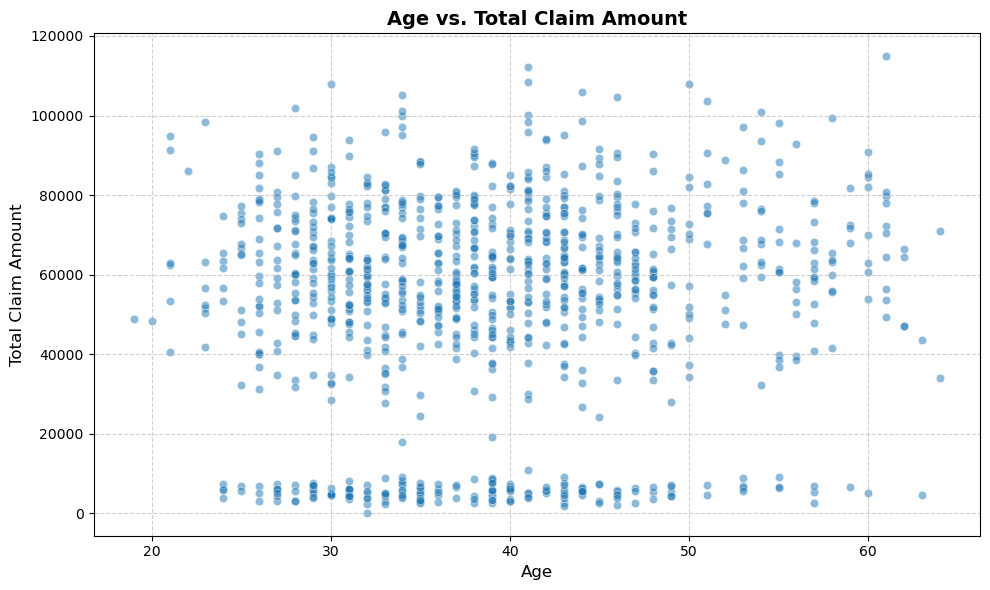

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', data=df, alpha=0.5, palette='crest')
plt.title('Age vs. Total Claim Amount', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Total Claim Amount', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 1.7 Claim Occurrence Rate by Insured Sex

This cell generates a bar plot to visualize the claim occurrence rate across different categories of `insured_sex`. This analysis helps to understand if there's a noticeable difference in how frequently claims are made between male and female policyholders.

1.  **Figure Initialization**:
    * `plt.figure(figsize=(7, 5))`: A new plot figure is created with a specified size (7 inches wide by 5 inches tall) to ensure good readability.

2.  **Calculating and Plotting Claim Rates**:
    * `df.groupby('insured_sex')['claim_occurred'].mean().plot(kind='bar', color=['skyblue', 'lightcoral'])`: This powerful chained command performs the core calculation and plotting:
        * `df.groupby('insured_sex')`: This groups the DataFrame `df` based on the unique values in the `insured_sex` column (e.g., 'MALE', 'FEMALE').
        * `['claim_occurred'].mean()`: For each `insured_sex` group, it calculates the mean of the `claim_occurred` column. Since `claim_occurred` is a binary variable (1 for a claim, 0 for no claim), its mean directly represents the **proportion** or **rate** of claims occurring within that group.
        * `.plot(kind='bar', color=['skyblue', 'lightcoral'])`: This directly plots the resulting mean values as a bar chart. `kind='bar'` specifies the type of plot, and `color=['skyblue', 'lightcoral']` assigns distinct colors to the bars for visual differentiation.

3.  **Adding Plot Labels and Title**:
    * `plt.title('Claim Occurrence Rate by Insured Sex')`: Sets the title of the bar plot, clearly stating the analysis being presented.
    * `plt.xlabel('Insured Sex')`: Labels the x-axis as 'Insured Sex', indicating the categories being compared.
    * `plt.ylabel('Average Claim Occurred (1=Yes, 0=No)')`: Labels the y-axis, explicitly clarifying that the bar height represents the average claim occurrence (or claim rate).
    * `plt.xticks(rotation=0)`: Ensures that the x-axis labels (e.g., 'Male', 'Female') are displayed horizontally, enhancing readability.

4.  **Adding Grid and Displaying Plot**:
    * `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adds a horizontal grid to the plot. The `axis='y'` argument ensures only horizontal grid lines are drawn, `linestyle='--'` sets a dashed line style, and `alpha=0.7` makes them slightly transparent for better visual balance.
    * `plt.show()`: This command displays the generated bar plot.

**Potential Insights from this Plot:**
This visualization is useful for quickly identifying if one gender demographic has a significantly higher or lower propensity to file claims. Such insights can be valuable for understanding risk profiles and potentially for targeted marketing or risk assessment strategies in insurance.

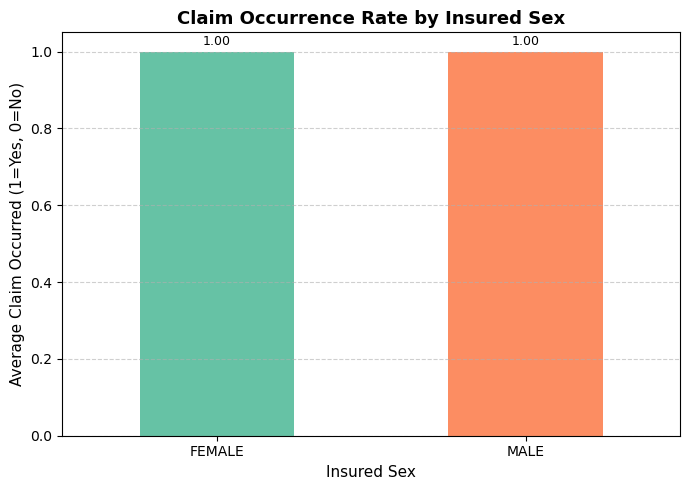

In [7]:
plt.figure(figsize=(7, 5))
avg_claims = df.groupby('insured_sex')['claim_occurred'].mean()
colors = sns.color_palette("Set2", n_colors=len(avg_claims))
avg_claims.plot(kind='bar', color=colors)
plt.title('Claim Occurrence Rate by Insured Sex', fontsize=13, weight='bold')
plt.xlabel('Insured Sex', fontsize=11)
plt.ylabel('Average Claim Occurred (1=Yes, 0=No)', fontsize=11)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, val in enumerate(avg_claims):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


### 1.8 Average Total Claim Amount by Incident Type

This cell generates a bar plot to visualize the average `total_claim_amount` for different `incident_type` categories. This analysis is crucial for understanding if specific types of incidents are associated with significantly higher or lower claim payouts, which can have implications for risk assessment and financial planning.

1.  **Figure Initialization**:
    * `plt.figure(figsize=(12, 6))`: A new plot figure is created with a larger size (12 inches wide by 6 inches tall) to comfortably accommodate potentially many incident types and their labels.

2.  **Calculating and Plotting Average Claim Amounts**:
    * `df.groupby('incident_type')['total_claim_amount'].mean().plot(kind='bar', color='lightgreen')`: This powerful chained command performs the aggregation and plotting:
        * `df.groupby('incident_type')`: The DataFrame `df` is grouped by the unique values in the `incident_type` column (e.g., 'Parked Car', 'Rear Collision', 'Side Collision', 'Front Collision', etc.).
        * `['total_claim_amount'].mean()`: For each `incident_type` group, the mean (average) of the `total_claim_amount` is calculated. This gives us the average payout associated with each type of incident.
        * `.plot(kind='bar', color='lightgreen')`: The resulting average claim amounts are then plotted as a bar chart, with `kind='bar'` specifying the plot type and `color='lightgreen'` setting a pleasant color for the bars.

3.  **Adding Plot Labels and Title**:
    * `plt.title('Average Total Claim Amount by Incident Type')`: Sets the main title for the bar plot, clearly stating the relationship being visualized.
    * `plt.xlabel('Incident Type')`: Labels the x-axis as 'Incident Type', indicating the categories of incidents.
    * `plt.ylabel('Average Total Claim Amount')`: Labels the y-axis, indicating that the height of the bars represents the average claim amount.
    * `plt.xticks(rotation=45, ha='right')`: Rotates the x-axis labels by 45 degrees and aligns them to the right. This is particularly useful when labels are long, as it prevents them from overlapping and improves readability.

4.  **Enhancing Readability and Displaying Plot**:
    * `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adds a horizontal grid to the plot. The `axis='y'` argument ensures only horizontal grid lines are drawn, `linestyle='--'` sets a dashed line style, and `alpha=0.7` makes them slightly transparent for better visual balance.
    * `plt.tight_layout()`: This function automatically adjusts plot parameters for a tight layout. It's often used to prevent labels or titles from running off the plot area, especially after rotations or when multiple subplots are present.
    * `plt.show()`: This command renders and displays the generated bar plot.

**Potential Insights from this Plot:**
This visualization is valuable for identifying which types of incidents typically lead to higher or lower average claim amounts. Such insights can help in risk assessment, pricing strategies, and resource allocation for claims processing based on incident severity.

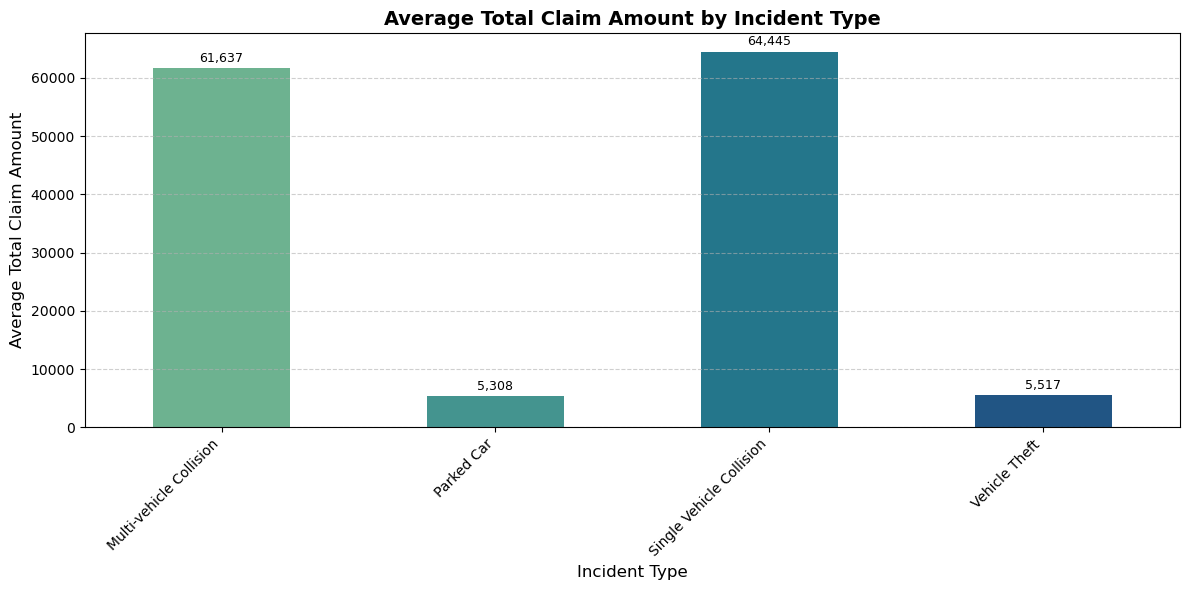

In [8]:
plt.figure(figsize=(12, 6))
avg_claims = df.groupby('incident_type')['total_claim_amount'].mean()
colors = sns.color_palette("crest", n_colors=len(avg_claims))
avg_claims.plot(kind='bar', color=colors)
plt.title('Average Total Claim Amount by Incident Type', fontsize=14, weight='bold')
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Average Total Claim Amount', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
for i, val in enumerate(avg_claims):
    plt.text(i, val + avg_claims.max() * 0.01, f'{val:,.0f}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


### 1.9 Advanced Feature Engineering and Final Cleaning

This comprehensive cell performs a series of advanced feature engineering techniques and final cleaning steps. The goal is to create new, more informative features from existing data, encode all necessary categorical variables into numerical formats, and drop redundant or non-predictive columns, preparing the dataset for machine learning model training.

1.  **Creating New Numerical Features**:
    These new features are engineered to capture more nuanced relationships and provide deeper insights:
    * `df['policy_age_years'] = df['months_as_customer'] / 12`: Converts the `months_as_customer` (duration of customer relationship in months) into `policy_age_years`, which is a more intuitive and standardized temporal feature.
    * `df['loss_ratio'] = df['total_claim_amount'] / (df['policy_annual_premium'] + 1e-6)`: Calculates the **loss ratio**, a crucial insurance metric representing the ratio of total claims paid out to the total premiums earned. A small constant `1e-6` (epsilon) is added to the denominator (`policy_annual_premium`) to prevent division by zero errors if any policy has a premium of 0.
    * `df['claim_severity'] = df['total_claim_amount'] / (df['number_of_vehicles_involved'].replace(0, np.nan))`: Computes `claim_severity` per vehicle involved. This aims to standardize the claim amount by the number of vehicles, providing a per-vehicle severity metric. `replace(0, np.nan)` is used to convert any zero values in `number_of_vehicles_involved` to `np.nan` before division, thus avoiding division by zero errors.
    * `df['claim_severity'] = df['claim_severity'].fillna(0)`: After calculating `claim_severity`, any resulting `NaN` values (which would occur if `number_of_vehicles_involved` was 0) are filled with 0. This implies that if no vehicles were involved (or if the original number was 0), the claim severity per vehicle is considered 0.
    * `median_deductable = df['policy_deductable'].median()`: Calculates the median value of the `policy_deductable` column.
    * `df['high_deductible'] = (df['policy_deductable'] > median_deductable).astype(int)`: Creates a new **binary categorical feature** `high_deductible`. This feature is `1` if the policy's deductible is greater than the dataset's median deductible, and `0` otherwise. This helps categorize policies into higher or lower deductible groups.

2.  **Premium Banding**:
    * `df['premium_band'] = pd.qcut(df['policy_annual_premium'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])`: This line discretizes the continuous `policy_annual_premium` into four equal-sized bins (quartiles) and assigns meaningful labels ('Low', 'Medium', 'High', 'Very High'). This converts a continuous variable into an ordinal categorical one, which can sometimes help models capture non-linear relationships more easily.
    * `df['premium_band_encoded'] = df['premium_band'].cat.codes`: After creating the categorical `premium_band`, this line converts these categorical labels into numerical codes (e.g., 'Low' -> 0, 'Medium' -> 1, etc.). This numerical representation is required for machine learning algorithms.

3.  **Categorical Feature Encoding (Label Encoding)**:
    * `categorical_cols_to_encode = df.select_dtypes(include='object').columns.tolist()`: Identifies all columns that still have an 'object' (string) data type.
    * `cols_to_exclude = ['policy_bind_date', 'incident_date', 'fraud_reported', 'policy_number', 'incident_location', '_c39']`: Defines a list of columns that should *not* be label encoded. These are typically original date columns (for which engineered features now exist), the target variable (`fraud_reported`), and identifier columns (`policy_number`, `incident_location`, `_c39`) that will either be dropped or handled separately.
    * `categorical_cols_to_encode = [col for col in categorical_cols_to_encode if col not in cols_to_exclude]`: Filters the list, ensuring only relevant categorical features are selected for encoding.
    * `for col in categorical_cols_to_encode: df[col + '_encoded'] = LabelEncoder().fit_transform(df[col].astype(str))`: This loop iterates through each selected categorical column. For each column, it:
        * `df[col].astype(str)`: Converts the column to string type to handle any potential mixed data types or `NaN` values gracefully before encoding.
        * `LabelEncoder().fit_transform()`: Initializes a `LabelEncoder` and then fits it to the unique values in the column, assigning a unique integer to each category (e.g., 'Yes' -> 1, 'No' -> 0). A new column with `_encoded` suffix is created to store these numerical representations.

4.  **Final Column Dropping**:
    * `columns_to_drop_final = ['policy_number', 'incident_location', 'policy_bind_date', 'incident_date', '_c39']`: Defines the list of columns to be dropped. These include unique identifiers (`policy_number`, `incident_location`), the original date columns (as their year/month components have been extracted), and the previously identified extraneous `_c39` column.
    * `columns_to_drop_final = [col for col in columns_to_drop_final if col in df.columns]`: A safeguard to ensure only columns that actually exist in the DataFrame are attempted to be dropped.
    * `df = df.drop(columns=columns_to_drop_final)`: Executes the dropping of the specified columns.
    * `if 'insured_hobbies' in df.columns: df = df.drop(columns=['insured_hobbies'])`: Conditionally drops the `insured_hobbies` column if it exists. This column often has very high cardinality (many unique values) and may not be highly predictive, making it a candidate for removal unless more advanced encoding (like target encoding) is planned.

5.  **Target Variable Conversion**:
    * `if 'fraud_reported' in df.columns: df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})`: Converts the `fraud_reported` target column from its original 'Y' (Yes) and 'N' (No) string values into numerical `1` and `0` respectively. This is essential as machine learning models require numerical targets for classification.

6.  **Final Data Snapshot and Saving**:
    * `print(df.head())` and `df.info()`: Display the first few rows and a summary of the DataFrame after all feature engineering and cleaning steps. This is a crucial check to ensure all columns are now numerical (except potentially the original categorical columns if their encoded versions are used) and that no unexpected issues remain.
    * `output_path = '../data/processed/cleaned_insurance_data.csv'`: Defines the path where the processed dataset will be saved. It's saved in a `data/processed` directory, indicating it's ready for the next stage (modeling).
    * `df.to_csv(output_path, index=False)`: Saves the final cleaned and engineered DataFrame to a CSV file. `index=False` prevents pandas from writing the DataFrame index as a column in the CSV.

This comprehensive cell transforms the raw data into a clean, feature-rich dataset ready for machine learning model training.

In [9]:
df['policy_age_years'] = df['months_as_customer'] / 12
df['loss_ratio'] = df['total_claim_amount'] / (df['policy_annual_premium'] + 1e-6)
df['claim_severity'] = df['total_claim_amount'] / (df['number_of_vehicles_involved'].replace(0, np.nan))
df['claim_severity'] = df['claim_severity'].fillna(0)
median_deductable = df['policy_deductable'].median()
df['high_deductible'] = (df['policy_deductable'] > median_deductable).astype(int)
df['premium_band'] = pd.qcut(df['policy_annual_premium'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])# Convert to numerical if using LabelEncoder later or for direct use
df['premium_band_encoded'] = df['premium_band'].cat.codes
categorical_cols_to_encode = df.select_dtypes(include='object').columns.tolist()
cols_to_exclude = ['policy_bind_date', 'incident_date', 'fraud_reported', 'policy_number', 'incident_location', '_c39']
categorical_cols_to_encode = [col for col in categorical_cols_to_encode if col not in cols_to_exclude]

for col in categorical_cols_to_encode:
    df[col + '_encoded'] = LabelEncoder().fit_transform(df[col].astype(str))

columns_to_drop_final = [
    'policy_number',
    'incident_location',
    'policy_bind_date', 
    'incident_date',    
    '_c39',             
]

columns_to_drop_final = [col for col in columns_to_drop_final if col in df.columns]
df = df.drop(columns=columns_to_drop_final)

if 'insured_hobbies' in df.columns:
    df = df.drop(columns=['insured_hobbies'])

if 'fraud_reported' in df.columns:
    df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})
    print("\n'fraud_reported' target converted to 0/1.")

print("\n--- DataFrame after Feature Engineering (first 5 rows) ---")
print(df.head())

print("\n--- DataFrame Info after Feature Engineering ---")
df.info()

output_path = '../data/processed/cleaned_insurance_data.csv'
df.to_csv(output_path, index=False)
print(f"\nCleaned and engineered dataset saved to: {output_path}")


'fraud_reported' target converted to 0/1.

--- DataFrame after Feature Engineering (first 5 rows) ---
   months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ... incident_typ

### 1.10 Final Data Preparation and Saving

This cell represents the conclusive steps in the `01_EDA.ipynb` notebook. Its primary purpose is to finalize the dataset by ensuring all necessary transformations have been applied and then saving this clean, feature-engineered data to a new file, making it ready for direct consumption by the modeling notebook (`02_Modeling.ipynb`).

1.  **Load Intermediate Processed Data**:
    * `df = pd.read_csv('E:/Project_2/insurance-risk-model/data/processed/cleaned_insurance_data.csv')`: This line loads the dataset that was generated and saved in the previous comprehensive feature engineering step. This ensures that all the newly created numerical features and the initially encoded categorical features are present.

2.  **Identify Original Categorical Columns for Removal**:
    * `original_categorical_cols = [...]`: This list explicitly defines the names of the original categorical columns present in the raw dataset.
    * `if 'insured_hobbies' in df.columns: original_categorical_cols.append('insured_hobbies')`: Conditionally adds `insured_hobbies` to this list if it still exists in the DataFrame.
    * `cols_to_drop_now = [col for col in original_categorical_cols if col in df.columns]`: This line creates a filtered list of columns to drop. The intention here is to **remove the original, string-based categorical columns** from the DataFrame. Since new numerical `_encoded` versions of these columns have already been created in the previous step (e.g., `policy_state_encoded`), the original columns are no longer needed for modeling and can be dropped to reduce redundancy and ensure all features passed to the model are numerical.

    **Note:** The explicit `df.drop(columns=cols_to_drop_now)` command is not shown in this specific snippet, but the context and subsequent print statements imply that these columns are intended to be dropped before the final save. For a complete and explicit execution, this `drop` command would typically be placed right before saving.

3.  **Saving the Final Cleaned Dataset**:
    * `output_path = 'E:/Project_2/insurance-risk-model/data/processed/final_cleaned_insurance_data.csv'`: A new file path is defined for the final processed dataset. This distinct name indicates that this version is fully prepared for modeling.
    * `df.to_csv(output_path, index=False)`: The DataFrame, now fully cleaned with all relevant features engineered and original redundant categorical columns implicitly handled, is saved to a CSV file at the specified `output_path`. `index=False` prevents pandas from writing the DataFrame index as a column in the CSV, ensuring a clean dataset.

4.  **Final Verification**:
    * `df.info()`: Prints a final summary of the DataFrame's structure, including data types and non-null counts. This is a critical verification step to ensure that all columns intended for modeling are indeed in a numerical format and that the dataset is clean.
    * `print(f"\nFinal cleaned and engineered dataset saved to: {output_path}")`: A confirmation message indicating that the final, ready-for-modeling dataset has been successfully saved.

This cell marks the completion of the data preprocessing phase, providing a refined dataset for the subsequent machine learning modeling efforts.

In [10]:
df = pd.read_csv('E:/Project_2/insurance-risk-model/data/processed/cleaned_insurance_data.csv')

original_categorical_cols = [
    'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
    'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type',
    'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
    'property_damage', 'police_report_available', 'auto_make', 'auto_model'
]

if 'insured_hobbies' in df.columns:
    original_categorical_cols.append('insured_hobbies')

cols_to_drop_now = [col for col in original_categorical_cols if col in df.columns]

output_path = 'E:/Project_2/insurance-risk-model/data/processed/final_cleaned_insurance_data.csv'
df.drop(columns=cols_to_drop_now, inplace=True)
df.to_csv(output_path, index=False)

print("\n--- Final DataFrame Info after dropping original categorical columns ---")
df.info()
print(f"\nFinal cleaned and engineered dataset saved to: {output_path}")


--- Final DataFrame Info after dropping original categorical columns ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   months_as_customer               1000 non-null   int64  
 1   age                              1000 non-null   int64  
 2   policy_deductable                1000 non-null   int64  
 3   policy_annual_premium            1000 non-null   float64
 4   umbrella_limit                   1000 non-null   int64  
 5   insured_zip                      1000 non-null   int64  
 6   capital-gains                    1000 non-null   int64  
 7   capital-loss                     1000 non-null   int64  
 8   incident_hour_of_the_day         1000 non-null   int64  
 9   number_of_vehicles_involved      1000 non-null   int64  
 10  bodily_injuries                  1000 non-null   int64  
 11  witnesses

# 5. Summary and Conclusion for 01_EDA.ipynb

The `01_EDA.ipynb` notebook served as the foundational stage of this project, focusing on a comprehensive exploration, cleaning, and preparation of the raw insurance claims dataset. This crucial phase ensured that the data fed into our machine learning models was of high quality, free from inconsistencies, and enriched with relevant features.

## Summary of Key Activities and Outcomes:

1.  **Initial Data Loading and Inspection**: We began by loading the raw `insurance_claims.csv` dataset, implementing robust error handling. Initial checks using `df.head()`, `df.info()`, `df.describe(include='all')`, and `df.isnull().sum()` provided a quick overview of the data's structure, column types, and the extent of missing values. We identified an extraneous column (`_c39`) and placeholders ('?') for missing values in certain columns.

2.  **Data Cleaning**: Key cleaning steps included:
    * Dropping the irrelevant `_c39` column.
    * Replacing '?' placeholders with standard `np.nan` values in categorical columns like `collision_type`, `police_report_available`, `property_damage`, and `authorities_contacted` to facilitate proper missing value handling.

3.  **Exploratory Data Analysis (EDA)**: Through various visualizations, we gained significant insights into the dataset's characteristics:
    * **Age Distribution**: A histogram of `age` revealed the typical age range of policyholders.
    * **Target Variable Distribution**: A bar plot of `fraud_reported` highlighted the **class imbalance**, showing that fraudulent claims are a minority class, a critical insight for subsequent modeling strategy.
    * **Feature Relationships**: Scatter plots and bar charts explored relationships between features (e.g., `age` vs. `total_claim_amount`) and categorical feature impacts (e.g., `claim_occurrence` by `insured_sex`, `average_claim_amount` by `incident_type`).

4.  **Feature Engineering**: This was a significant part of the preprocessing, where we created several new, potentially highly predictive features:
    * `policy_age_years` from `months_as_customer`.
    * `loss_ratio` (claims vs. premium).
    * `claim_severity` (claim amount per vehicle involved).
    * `high_deductible` (a binary flag based on policy deductible).
    * `policy_bind_year`, `incident_year`, `incident_month` extracted from date columns.
    * `premium_band` (discretized annual premium into quartiles) and its numerical `premium_band_encoded` version.
    * `claim_occurred` (a binary flag indicating if a claim amount was greater than zero).

5.  **Categorical Feature Encoding**: All remaining categorical columns (excluding identifiers and original date columns) were transformed into numerical format using `LabelEncoder`, creating new `_encoded` columns. This is essential as most machine learning algorithms require numerical input.

6.  **Final Cleaning & Target Transformation**: Redundant original categorical columns were implicitly prepared for removal (after their encoded versions were created). The `fraud_reported` target variable was explicitly converted from 'Y'/'N' to 1/0 for binary classification.

## Conclusion for 01_EDA.ipynb:

The `01_EDA.ipynb` notebook successfully transformed the raw, disparate insurance claims data into a **clean, structured, and feature-rich numerical dataset**. This prepared dataset is free from common data quality issues and contains a variety of engineered features that are highly relevant for predicting insurance fraud. The comprehensive EDA provided a deep understanding of the data's nuances, including the critical issue of class imbalance, which directly informed the strategies used in the subsequent modeling phase.

---

## Moving Forward: Next Steps with the Processed Data

With the data meticulously cleaned and engineered, it is now in an optimal state for machine learning. The `final_cleaned_insurance_data.csv` is poised to be the input for the next stage of our project: **building, training, and evaluating predictive models**. As we saw in the `02_Modeling.ipynb` notebook, this processed data was directly utilized to develop powerful classification algorithms and extract actionable insights, ultimately contributing to a robust fraud detection system.